# Laptop Battery Life
Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

Challenge

You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

The first number denotes the amount of time the laptop was charged.
The second number denotes the amount of time the battery lasted.
The training data file can be downloaded here (this will be the same training data used when your program is run). The input for each of the test cases will consist of exactly 1 number rounded to 2 decimal places. For each input, output 1 number: the amount of time you predict his battery will last.

Sample Input

1.50

Sample Output

3.00

Scoring

Your score will be 10-X, where X is the sum of the distances you are from expected answer of each test case. For instance if there are 2 test cases with expected answer 4 and you print 3 for the first one and 6 for the second one your score will be 10-(1+2) = 7.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/trainingdata.txt", header=None, names=["charge","use"])

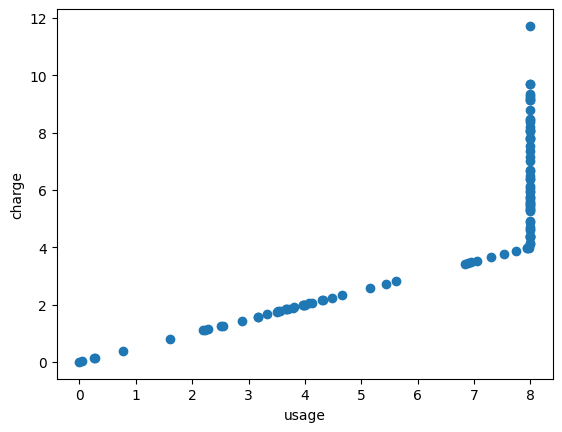

In [3]:
plt.scatter(x=df["use"],y=df["charge"])
plt.xlabel("usage")
plt.ylabel("charge")
plt.show()

In [4]:
X,y = df["charge"].to_numpy().reshape(-1,1), df["use"].to_numpy().reshape(-1,1)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train = [x for x in X_train if x< 4.0]
y_train = [y for y in y_train if y<8.0]

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
def predict(X_test):
    X_test= np.squeeze(X_test)
    X_test[X_test>[4.0]]=4.0
    return model.predict(X_test.reshape(-1,1))
    
y_pred = predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2.0670620907119324e-30
R² Score: 1.0
